<a href="https://colab.research.google.com/github/Jay0310/Jay0310.github.io/blob/master/FB_Graph_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import os
import pickle
import csv
import datetime
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans,KMeans
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import pdb
import networkx as nx


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Reading a dataframe
traincsv=pd.read_csv('/content/drive/My Drive/dataset/Facebook GraphLink/train.csv')

In [4]:
traincsv.isnull().any()

source_node         False
destination_node    False
dtype: bool

In [5]:
traincsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
source_node         int64
destination_node    int64
dtypes: int64(2)
memory usage: 144.0 MB


In [6]:
traincsv.duplicated().sum()

0

In [0]:
#removing header and saving the file
traincsv.to_csv('woheader.csv',header=False,index=False)

In [0]:
g=nx.read_edgelist('woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [9]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [10]:
len(g.nodes())

1862220

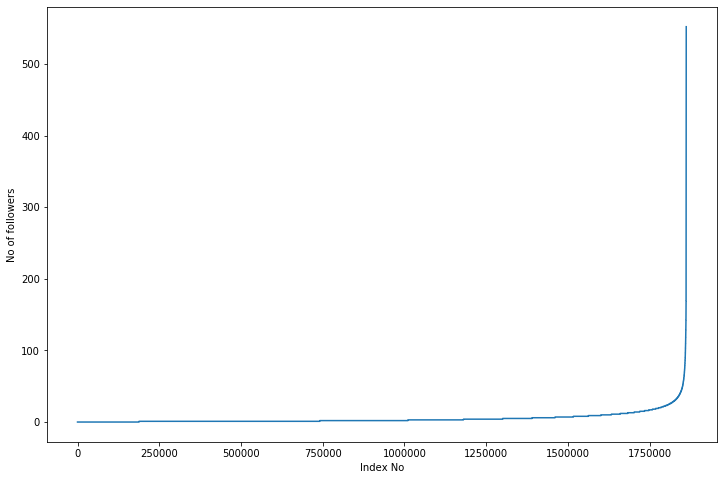

In [11]:
#Performing EDA
in_degree_dist=list(dict(g.in_degree()).values())
in_degree_dist.sort()
plt.figure(figsize=(12,8))
plt.plot(in_degree_dist)
plt.xlabel('Index No')
plt.ylabel('No of followers')
plt.show()

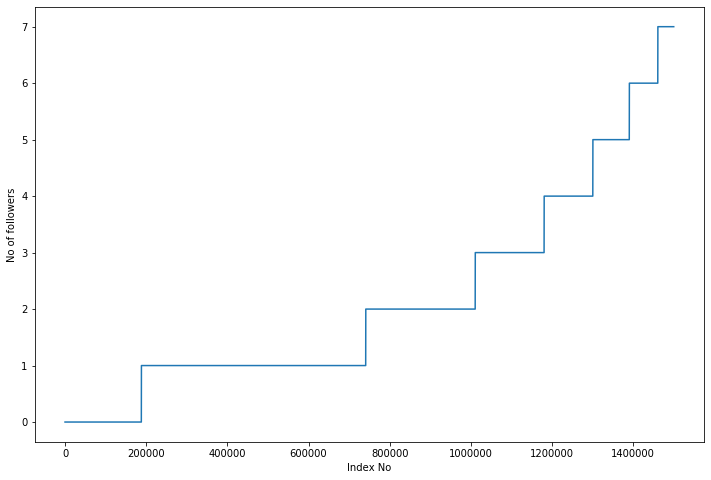

In [12]:
#Zooming the plot 
in_degree_dist=list(dict(g.in_degree()).values())
in_degree_dist.sort()
plt.figure(figsize=(12,8))
plt.plot(in_degree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No of followers')
plt.show()

In [13]:
#Computing the percentile
for i in range(0,11):
  print(90+i,'percentile value is ',np.percentile(in_degree_dist,90+i))

90 percentile value is  12.0
91 percentile value is  13.0
92 percentile value is  14.0
93 percentile value is  15.0
94 percentile value is  17.0
95 percentile value is  19.0
96 percentile value is  21.0
97 percentile value is  24.0
98 percentile value is  29.0
99 percentile value is  40.0
100 percentile value is  552.0


In [14]:
#99 to 100 percentile
for i in range(10,110,10):
  print(99+(i/100),"percentile value is ",np.percentile(in_degree_dist,99+(i/100)))

99.1 percentile value is  42.0
99.2 percentile value is  44.0
99.3 percentile value is  47.0
99.4 percentile value is  50.0
99.5 percentile value is  55.0
99.6 percentile value is  61.0
99.7 percentile value is  70.0
99.8 percentile value is  84.0
99.9 percentile value is  112.0
100.0 percentile value is  552.0


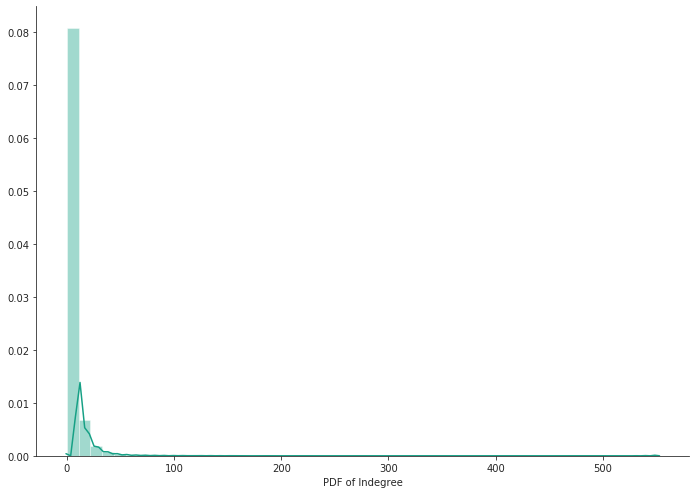

In [15]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(in_degree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

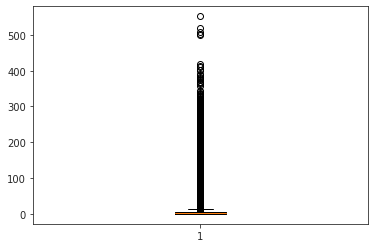

In [16]:
#plotting the box plot
plt.boxplot(in_degree_dist)
plt.show()

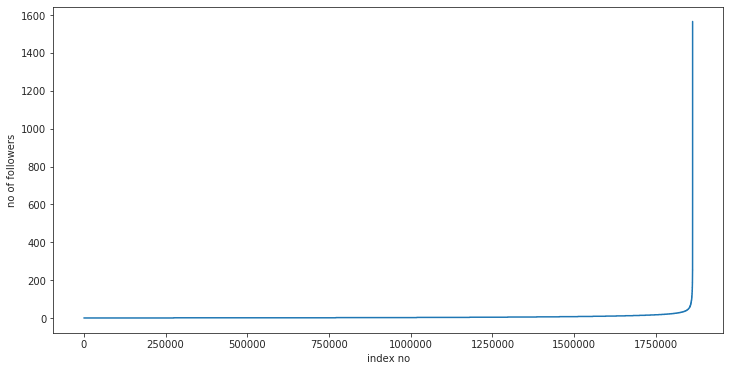

In [17]:
#Similarly for outdegree
out_degree_dist=list(dict(g.out_degree()).values())
out_degree_dist.sort()
plt.figure(figsize=(12,6))
plt.plot(out_degree_dist)
plt.xlabel("index no")
plt.ylabel("no of followers")
plt.show()

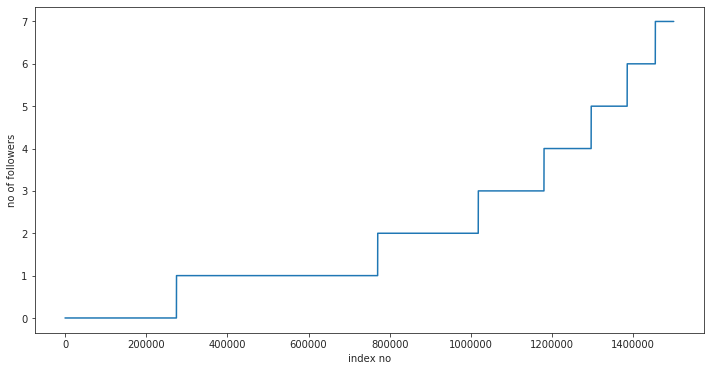

In [18]:
plt.figure(figsize=(12,6))
plt.plot(out_degree_dist[0:1500000])
plt.xlabel("index no")
plt.ylabel("no of followers")
plt.show()

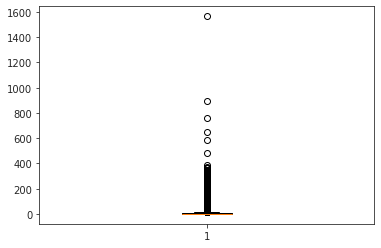

In [19]:
plt.boxplot(out_degree_dist)
plt.show()

In [20]:
#Computing the percentile
for i in range(0,11):
  print(90+i,"percentile value is ",np.percentile(out_degree_dist,90+i))

90 percentile value is  12.0
91 percentile value is  13.0
92 percentile value is  14.0
93 percentile value is  15.0
94 percentile value is  17.0
95 percentile value is  19.0
96 percentile value is  21.0
97 percentile value is  24.0
98 percentile value is  29.0
99 percentile value is  40.0
100 percentile value is  1566.0


In [21]:
for i in range(10,110,10):
  print(99+(i/100),"percentile value is ",np.percentile(out_degree_dist,99+(i/100)))

99.1 percentile value is  42.0
99.2 percentile value is  45.0
99.3 percentile value is  48.0
99.4 percentile value is  52.0
99.5 percentile value is  56.0
99.6 percentile value is  63.0
99.7 percentile value is  73.0
99.8 percentile value is  90.0
99.9 percentile value is  123.0
100.0 percentile value is  1566.0


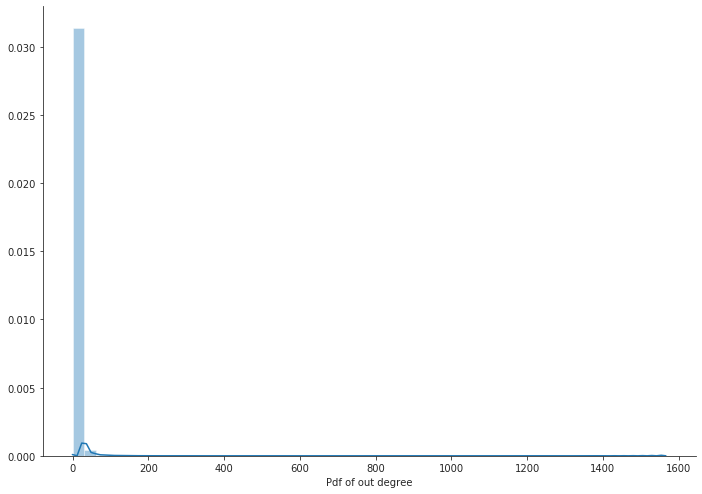

In [22]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.distplot(out_degree_dist)
plt.xlabel('Pdf of out degree')
sns.despine()


In [23]:
print('No of persons those are not following anyone are' ,sum(np.array(out_degree_dist)==0),'and % is',
                                sum(np.array(out_degree_dist)==0)*100/len(out_degree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [24]:
print('No of persons having zero followers are' ,sum(np.array(in_degree_dist)==0),'and % is',
                                sum(np.array(in_degree_dist)==0)*100/len(in_degree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [25]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


In [0]:
#Adding indegree and outdegree
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

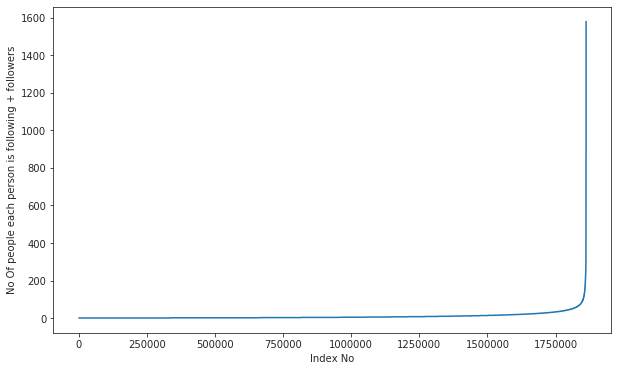

In [27]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

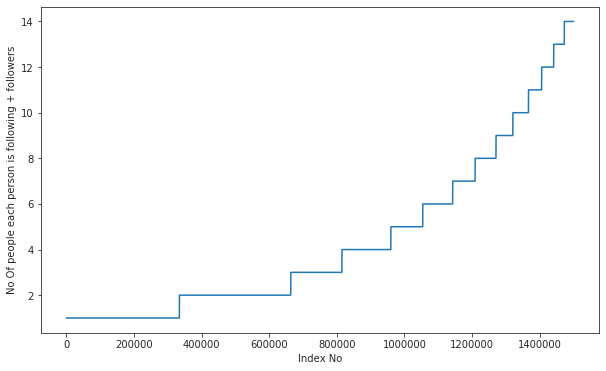

In [28]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [29]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [30]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [31]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [32]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))


No of persons having followers + following less than 10 are 1320326


In [33]:
#Weakly connected components
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


In [0]:
#Generating bad edges that are not present in data and also path greater than 2#getting all set of edges
r = csv.reader(open('woheader.csv','r'))
edges = dict()
for edge in r:
    edges[(edge[0], edge[1])] = 1

In [0]:
%%time
###generating bad edges from given graph
import random
missing_edges = set([])
while (len(missing_edges)<9437519):
    a=random.randint(1, 1862220)
    b=random.randint(1, 1862220)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if nx.shortest_path_length(g,source=a,target=b) > 2: 
                
                missing_edges.add((a,b))
            else:
                continue  
        except:  
                missing_edges.add((a,b))              
    else:
        continue

In [0]:
import pickle
pickle.dump(missing_edges,open('missing_edges_final.p','wb'))
missing_edges = pickle.load(open('missing_edges_final.p','rb'))